# 3️⃣ **프로젝트 3: 한국 부동산 시장 분석 및 투자 전략 수립**  
https://rt.molit.go.kr/pt/xls/xls.do?mobileAt=  
**과제 1: 수도권 vs 지방 (or 서울 인기구 vs 비인기구) 부동산 시장 비교 분석**  
수도권(서울, 경기, 인천)과 주요 지방 광역시의 부동산 가격 변동 패턴을 비교 분석하고, 지역별 시장 특성과 투자 매력도를 평가하세요.  
**과제 2: 아파트 규모별 가격 트렌드 및 생애주기 투자 전략**  
전용면적별(소형, 중형, 대형) 아파트의 가격 변동 추이를 분석하고, 생애주기에 따른 최적 투자 전략과 거주 전략을 데이터 기반으로 제시하세요.  
**과제 3: 부동산 거래량과 가격의 선행지표 관계 분석**  
부동산 거래량 변화가 가격 변동에 미치는 영향을 시차 분석을 통해 파악하고, 시장 전환점을 예측할 수 있는 지표를 개발하세요.  
**자유 주제**  
한국 부동산 시장의 구조적 특성을 고려한 새로운 분석 관점에서 투자자나 정책 입안자에게 도움이 될 수 있는 인사이트를 자유롭게 도출하세요.

### 과제 1 가설

#### 1순위  
- **H1. 전용면적 및 면적 구간(area_bin)은 부동산 가격 변동의 가장 중요한 설명 변수이며, 지역 간 가격 차이를 주도한다.**  
- **H2. 수치형 변수(전용면적, 건축년도, building_age)가 가격과 평당가에 유의미하게 영향을 미치며, 특히 전용면적이 가장 강력한 설명변수다.**
---
#### 2순위
- **H3. 신축 여부(is_new_building)는 평당가(log_price_per_m2)에 지역별로 중~큰 차별 효과를 가진다.**  
- **H4. 수도권보다는 지방에서 신축 여부에 따른 가격 영향력이 상대적으로 크다.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
processed_seoul = pd.read_csv('processed_seoul.csv')
processed_gyeonggi = pd.read_csv('processed_gyeonggi.csv')
processed_incheon = pd.read_csv('processed_incheon.csv')
processed_busan = pd.read_csv('processed_busan.csv')
processed_daegu = pd.read_csv('processed_daegu.csv')
processed_gwangju = pd.read_csv('processed_gwangju.csv')
processed_daejeon = pd.read_csv('processed_daejeon.csv')
processed_ulsan = pd.read_csv('processed_ulsan.csv')

In [3]:
# 도시별 df 딕셔너리
city_dfs = {
    '서울특별시': processed_seoul,
    '경기도': processed_gyeonggi,
    '인천광역시': processed_incheon,
    '부산광역시': processed_busan,
    '대구광역시': processed_daegu,
    '광주광역시': processed_gwangju,
    '대전광역시': processed_daejeon,
    '울산광역시': processed_ulsan
}

In [4]:
"""
데이터셋 칼럼 설명

0   '권역': 행정 구역 기준 권역 정보 (수도권/지방)
1   '시군구': 시/군/구 단위 행정 구역명
2   '번지': 도로명 주소의 번지 정보
3   '본번': 도로명 주소의 본번
4   '부번': 도로명 주소의 부번
5   '단지명': 아파트 단지 이름
6   '계약년월': 계약 발생 연월 (YYYYMM)
7   '계약년도': 계약 발생 연도 (YYYY)
8   '계약월': 계약 발생 월 (1~12)
9   '계약일': 계약 발생 일 (1~31)
10  'contract_season': 계약 발생 계절 (봄/여름/가을/겨울)
11  'area_bin': 전용면적 기준 면적 구간
    - 분류 기준:
        - ≤60 ㎡ : 소형
        - 61~85 ㎡ : 중소형
        - 86~135 ㎡ : 중대형
        - >135 ㎡ : 대형
12  '전용면적(㎡)': 아파트의 전용면적 (㎡)
13  '거래금액(만원)': 실제 거래 금액 (만원)
14  'price_per_m2': 평당 가격 (만원/㎡)
15  '층': 거래된 주택의 층수
16  '건축년도': 건물 준공 연도
17  'building_age': 건물 연식 (계약년도 - 건축년도)
18  'is_new_building': 신축 여부 (True: 5년 이하 신축)
19  'log_거래금액': 거래금액(만원)의 로그 변환 값
20  'log_price_per_m2': price_per_m2의 로그 변환 값
"""

processed_seoul.head()

,권역,시군구,번지,본번,부번,단지명,계약년월,계약년도,계약월,계약일,...,area_bin,전용면적(㎡),거래금액(만원),price_per_m2,층,건축년도,building_age,is_new_building,log_거래금액,log_price_per_m2
0,수도권,서울특별시 강남구 개포동,1164-12,1164,12,새롬(1164-12),201205,2012,5,17,...,중소형,73.50,38000.0,517.0,6,2000,12,False,10.545341,6.248043
1,수도권,서울특별시 강남구 개포동,1164-12,1164,12,새롬(1164-12),201507,2015,7,28,...,중소형,73.50,42000.0,571.4,3,2000,15,False,10.645425,6.348089
2,수도권,서울특별시 강남구 개포동,1164-12,1164,12,새롬(1164-12),201709,2017,9,23,...,중소형,71.72,64500.0,899.3,7,2000,17,False,11.074421,6.801617
3,수도권,서울특별시 강남구 개포동,1164-12,1164,12,새롬(1164-12),201707,2017,7,21,...,중소형,73.50,55400.0,753.7,2,2000,17,False,10.922335,6.624994
4,수도권,서울특별시 강남구 개포동,1164-13,1164,13,새롬(1164-13),201001,2010,1,5,...,소형,59.67,35000.0,586.6,3,2000,10,False,10.463103,6.374343


### **H1. 전용면적 및 면적 구간(area_bin)은 부동산 가격 변동의 가장 중요한 설명 변수이며, 지역 간 가격 차이를 주도한다.**
### **H2. 수치형 변수(전용면적, 건축년도, building_age)가 가격과 평당가에 유의미하게 영향을 미치며, 특히 전용면적이 가장 강력한 설명변수다.**
<br>

#### **검증 방법 및 분석 절차**

1. **데이터 전처리 & 표본 추출 (Stratified Sampling)** 
    - **거래량 집계**: 도시별 df에서 `groupby(['시군구', '계약년도']).size()`를 통해 시군구 및 계약년도별 거래 건수(거래량)를 집계합니다. 
    - **최소 표본 필터링**: `groupby(['시군구', '계약년도'])` 기준 거래 건수 임계값 미만인 그룹의 데이터는 분석에서 제외합니다. 
    - **가중치 산출**: 필터링 후 남은 데이터에 대해, 각 행이 속한 시군구-계약년도 그룹의 거래 건수를 해당 행의 가중치로 사용할 준비를 합니다. 
    - **계층화된 무작위 표본 추출 (Stratified Sampling)**: 필터링된 전체 데이터에서 계층화된 무작위 표본 추출을 수행합니다. 예를 들어, `권역`, `area_bin`, `is_new_building` 등을 층화 변수로 사용하여 원본 데이터의 비율을 최대한 유지하면서 일정 비율(예: 5% 또는 10만 행)의 데이터를 무작위로 추출하여 분석에 사용할 표본 데이터셋을 만듭니다. 이는 분석 시간 및 메모리 문제를 해결하는 동시에, 표본이 전체 모집단을 잘 대표하도록 합니다.

2. **변수 간 상관관계 및 정보량 분석 (표본 데이터 사용)**

    - 로그 변환 변수(`log_거래금액`, `log_price_per_m2`)를 사용합니다.
    - 표본 데이터에 대해 `전용면적(㎡)`, `건축년도`, `building_age` 등 주요 수치 변수와 로그 변환 변수 간 **피어슨 상관계수 및 상호 정보량(MI)**을 계산합니다.  
        (상호 정보량 계산 시 가중치를 직접적으로 반영하기 어려울 수 있으나, 이미 필터링 및 층화 추출된 표본을 사용하므로 표본 편향이 최소화된 상태입니다.)

3.  **그룹별 분포 및 차이 분석 (표본 데이터 사용)**

    - `area_bin`, `권역` 등 주요 범주형 변수별 로그 변환 변수의 분포를 시각화(박스플롯·violinplot)합니다. 
    - **표본 데이터**에 대해 각 그룹별 **거래량 가중치를 고려한 가중 평균**을 계산합니다.
    - **표본 데이터**에 대해 거래량 가중치를 적용한 **그룹별 ANOVA 검정**을 수행하여 그룹 간 유의미한 차이를 확인합니다.

4. **다변량 회귀분석 (가중 최소 제곱, 표본 데이터 사용)**

    - **독립변수**: `전용면적(㎡)`, `건축년도`, `building_age` (수치형), `area_bin`, `is_new_building`, `권역` (범주형) 등
    - **종속변수**: `log_거래금액`, `log_price_per_m2`
    - **표본 데이터**에 대해 **거래량 가중치를 부여하여 가중 최소 제곱(WLS)** 회귀분석을 수행합니다. (`statsmodels.formula.api.ols`의 `weights` 파라미터 활용)  
        이는 표본 편향을 최소화하고 각 거래의 중요도를 반영합니다.
    - `교란 변수`(면적 구간, 신축 여부 등)를 통제한 후 **수도권 vs 지방 권역 효과**를 검정합니다.
    - `C(권역):C(area_bin)` 및 `C(권역):C(is_new_building)`과 같은 **상호작용 항**을 모델에 포함하여 권역에 따라 면적과 신축 여부가 가격에 미치는 영향이 어떻게 달라지는지 분석합니다.

5. **결과 검증 및 해석 (표본 데이터 기반)**
    - 로그 변환 가격 변수 활용의 효과 및 극단치 영향 완화 여부를 확인합니다.
    - 거래량 가중치 및 필터링/표본 추출 적용 전후 분석 결과(가능하다면)를 비교하고 해석합니다.
    - 면적, 신축 여부, 권역 및 이들 간의 상호작용 효과를 바탕으로 **수도권과 지방 부동산 시장의 특성 및 투자 매력도**를 종합적으로 평가하고 결론을 도출합니다.

In [5]:
# 거래 건수 임계값 설정
count_results = []

for city, city_df in city_dfs.items():
    total_rows = len(city_df)

    # (시군구, 계약년도) 조합별 개수
    counts = city_df.groupby(['시군구', '계약년도']).size()

    # 50 미만인 조합만 선택
    mask = counts < 50

    # 조건 만족하는 (시군구, 계약년도) 조합 리스트
    valid_combos = mask[mask].index

    # city_df에서 해당 조합과 일치하는 행만 추출
    filtered_rows = city_df.set_index(['시군구', '계약년도']).loc[valid_combos].reset_index()
    filtered_count = len(filtered_rows)

    # 비율 계산
    percentage = (filtered_count / total_rows * 100) if total_rows > 0 else 0

    count_results.append({
        "도시": city,
        "조건 만족 행 수": filtered_count,
        "전체 행 수": total_rows,
        "비율(%)": round(percentage, 2)
    })

# 결과 DataFrame으로 정리
count_results_df = pd.DataFrame(count_results)
print(count_results_df)

"""
모든 도시에서 표본 미달 행이 전체 행의 1.2%~2.6% 정도로 매우 낮은 편으로 확인됨
거래 건수 임계값(50건) 미만의 최소 표본 필터링 → 남은 지역에는 거래량 가중치 적용
"""

      도시  조건 만족 행 수   전체 행 수  비율(%)
0  서울특별시      19132   784750   2.44
1    경기도      35246  1466358   2.40
2  인천광역시       4329   332003   1.30
3  부산광역시       7779   445732   1.75
4  대구광역시       6485   332090   1.95
5  광주광역시       2846   238439   1.19
6  대전광역시       4064   212397   1.91
7  울산광역시       4493   170410   2.64


'\n모든 도시에서 표본 미달 행이 전체 행의 1.2%~2.6% 정도로 매우 낮은 편으로 확인됨\n거래 건수 임계값(50건) 미만의 최소 표본 필터링 → 남은 지역에는 거래량 가중치 적용\n'

In [6]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import mutual_info_regression

# def create_dummy_df(city_name: str, num_rows: int = 50000) -> pd.DataFrame:
#     """
#     분석을 위한 더미 데이터프레임을 생성합니다.
#     실제 데이터는 city_dfs 딕셔너리에 로드되어 있다고 가정합니다.

#     Args:
#         city_name (str): 도시 이름 (예: '서울특별시', '부산광역시').
#         num_rows (int): 생성할 데이터 행의 수.

#     Returns:
#         pd.DataFrame: 생성된 더미 데이터프레임.
#     """
#     np.random.seed(42) # 재현성을 위해 시드 설정
#     is_capital_area = True if city_name in ['서울특별시', '경기도', '인천광역시'] else False
    
#     # 수도권과 지방 간 가격 차이를 시뮬레이션하기 위한 기본 가격 설정
#     base_trade_price = np.random.normal(loc=150000, scale=30000, size=num_rows) # 평균 1억5천, 표준편차 3천
#     base_price_per_m2 = np.random.normal(loc=2000, scale=400, size=num_rows) # 평균 2000, 표준편차 400
    
#     # 수도권은 가격을 약간 높게 설정
#     if is_capital_area:
#         base_trade_price *= 1.3 # 수도권은 30% 높게
#         base_price_per_m2 *= 1.3
        
#     data = {
#         '권역': ['수도권' if is_capital_area else '지방'] * num_rows,
#         '시군구': [city_name] * num_rows,
#         '번지': [f'1-{i}' for i in range(num_rows)],
#         '본번': [1] * num_rows,
#         '부번': [i for i in range(num_rows)],
#         '단지명': [f'아파트{i}' for i in range(num_rows)],
#         '계약년월': np.random.randint(202001, 202412, num_rows),
#         '계약년도': np.random.randint(2020, 2025, num_rows),
#         '계약월': np.random.randint(1, 13, num_rows),
#         '계약일': np.random.randint(1, 31, num_rows),
#         'contract_season': np.random.choice(['봄', '여름', '가을', '겨울'], num_rows),
#         'area_bin': pd.Series(np.random.choice(['소형', '중소형', '중대형', '대형'], num_rows, p=[0.2, 0.4, 0.3, 0.1])).astype('category'),
#         '전용면적(㎡)': np.random.rand(num_rows) * 150 + 30, # 30~180
#         '거래금액(만원)': base_trade_price, 
#         'price_per_m2': base_price_per_m2, 
#         '층': np.random.randint(1, 30, num_rows),
#         '건축년도': np.random.randint(1980, 2023, num_rows),
#         'is_new_building': np.random.choice([True, False], num_rows, p=[0.15, 0.85]),
#     }
#     df = pd.DataFrame(data)
#     df['building_age'] = df['계약년도'] - df['건축년도']
#     df['log_거래금액'] = np.log(df['거래금액(만원)'].abs().replace(0, 1e-6)) # 0이나 음수 값 처리
#     df['log_price_per_m2'] = np.log(df['price_per_m2'].abs().replace(0, 1e-6)) # 0이나 음수 값 처리
    
#     # 더미 데이터에 시군구-계약년도별 거래량 불균형 및 50개 미만 그룹 시뮬레이션
#     if num_rows > 1000: # 충분히 큰 데이터에 대해서만 시뮬레이션
#         # 일부러 작은 그룹을 만들어서 필터링이 적용되도록 함
#         df.loc[df.sample(frac=0.01, random_state=42).index, '계약년도'] = 2019 # 1%는 2019년도
#         df.loc[df.sample(frac=0.005, random_state=42).index, '시군구'] = '가상의구' # 0.5%는 가상의구
            
#     return df

# # 실제 데이터 로드를 시뮬레이션하기 위해 더미 데이터프레임 생성 (총 40만개 행 시뮬레이션)
# city_names = ['서울특별시', '경기도', '인천광역시', '부산광역시', '대구광역시', '광주광역시', '대전광역시', '울산광역시']
# city_dfs = {name: create_dummy_df(name, num_rows=50000) for name in city_names} # 각 5만 행 -> 총 40만 행

# 모든 도시 데이터 합치기 (전처리 2단계부터 통합 분석을 위해)
combined_df = pd.concat(city_dfs.values(), ignore_index=True)

In [7]:
# --- 1. 데이터 전처리 (거래량 집계, 필터링, 가중치 산출, 계층화 표본 추출) ---
print("--- 데이터 전처리 시작 ---", flush=True)

# '시군구'와 '계약년도'별 거래량 집계
transaction_counts = combined_df.groupby(['시군구', '계약년도']).size().reset_index(name='transaction_count')

# combined_df에 거래량 정보 병합
combined_df = pd.merge(combined_df, transaction_counts, on=['시군구', '계약년도'], how='left')

# 거래 건수 임계값(50건) 미만의 최소 표본 필터링
original_rows = len(combined_df)
filtered_df = combined_df[combined_df['transaction_count'] >= 50].copy()
filtered_rows = len(filtered_df)
print(f"원본 데이터 행 수: {original_rows}", flush=True)
print(f"거래 건수 50건 미만 필터링 후 행 수: {filtered_rows} ({filtered_rows/original_rows:.2%})", flush=True)
print(f"필터링된 행 수: {original_rows - filtered_rows}", flush=True)

# 필터링된 데이터에 가중치 컬럼 생성
# WLS에서는 일반적으로 분산의 역수를 가중치로 사용. 거래량이 많을수록 추정치의 분산이 작아진다고 가정하여
# 거래량 자체를 가중치로 사용하면 더 안정적인 추정치를 얻을 수 있음.
# 수치 안정성 문제를 방지하기 위해 최대값으로 스케일링 (0~1 범위)
if not filtered_df['transaction_count'].empty:
    max_transaction_count = filtered_df['transaction_count'].max()
    filtered_df['weights'] = filtered_df['transaction_count'] / max_transaction_count
else:
    filtered_df['weights'] = 1.0 # 데이터가 없으면 기본 가중치 1.0


# 계층화된 무작위 표본 추출 (Stratified Sampling)
# 층화 변수 설정: '권역', 'area_bin', 'is_new_building'
# 이 변수들의 조합으로 층을 나누어 각 층의 비율을 유지하며 표본 추출
strat_cols = ['권역', 'area_bin', 'is_new_building']
sample_fraction = 0.1 # 필터링된 데이터의 10%를 추출 (예시)

# 층화 변수에 NA가 있으면 오류 발생 가능성이 있으므로 NA 제거
sampled_df = filtered_df.dropna(subset=strat_cols).copy()

# 각 층별 샘플링
# .sample(frac=sample_fraction)을 사용하면 각 그룹에서 지정된 비율만큼 추출.
# 만약 어떤 그룹의 크기가 너무 작아 frac * len(x) < 1 이 되면 샘플링이 안될 수 있음.
# 그러한 경우를 대비하여 최소 1개는 추출하도록 하거나, 해당 그룹을 건너뛰도록 처리.
if not sampled_df.empty:
    def safe_stratified_sample(group):
        n_samples = max(1, int(len(group) * sample_fraction)) # 최소 1개 샘플링
        return group.sample(n=n_samples, random_state=42) if len(group) > 0 else group
    
    sampled_df = sampled_df.groupby(strat_cols, group_keys=False).apply(safe_stratified_sample).reset_index(drop=True)
else:
    print("경고: 필터링 후 데이터가 비어있어 표본 추출을 진행할 수 없습니다.", flush=True)


print(f"필터링 후 데이터 행 수: {len(filtered_df)}", flush=True)
print(f"계층화 표본 추출 후 행 수: {len(sampled_df)}", flush=True)
print("--- 데이터 전처리 완료 ---", flush=True)

--- 데이터 전처리 시작 ---
원본 데이터 행 수: 3982179
거래 건수 50건 미만 필터링 후 행 수: 3897805 (97.88%)
필터링된 행 수: 84374


C:\Users\AY\AppData\Local\Temp\ipykernel_10232\2855329377.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = sampled_df.groupby(strat_cols, group_keys=False).apply(safe_stratified_sample).reset_index(drop=True)


필터링 후 데이터 행 수: 3897805
계층화 표본 추출 후 행 수: 389774
--- 데이터 전처리 완료 ---



--- 가설 검증 시작 (계층화 표본 데이터 기반) ---
--------------------------------------------------

--- 전체 필터링된 표본 데이터: 수치형 변수 상관관계 및 정보량 분석 ---

  타겟: log_거래금액
  [피어슨 상관계수 (표본 데이터 기반)]
전용면적(㎡)         0.596144
건축년도            0.296641
building_age   -0.201864
Name: log_거래금액, dtype: float64
  [상호 정보량 (MI - 표본 데이터 기반, 가중치 미반영)]
전용면적(㎡)         0.518739
건축년도            0.207080
building_age    0.140147
dtype: float64

  타겟: log_price_per_m2
  [피어슨 상관계수 (표본 데이터 기반)]
건축년도            0.200609
전용면적(㎡)         0.069603
building_age   -0.086185
Name: log_price_per_m2, dtype: float64
  [상호 정보량 (MI - 표본 데이터 기반, 가중치 미반영)]
전용면적(㎡)         1.569110
건축년도            0.217698
building_age    0.109086
dtype: float64

--- 그룹별 분포 및 차이 분석 (area_bin, 권역) ---

  변수 'area_bin'에 따른 타겟 'log_거래금액' 분포 분석


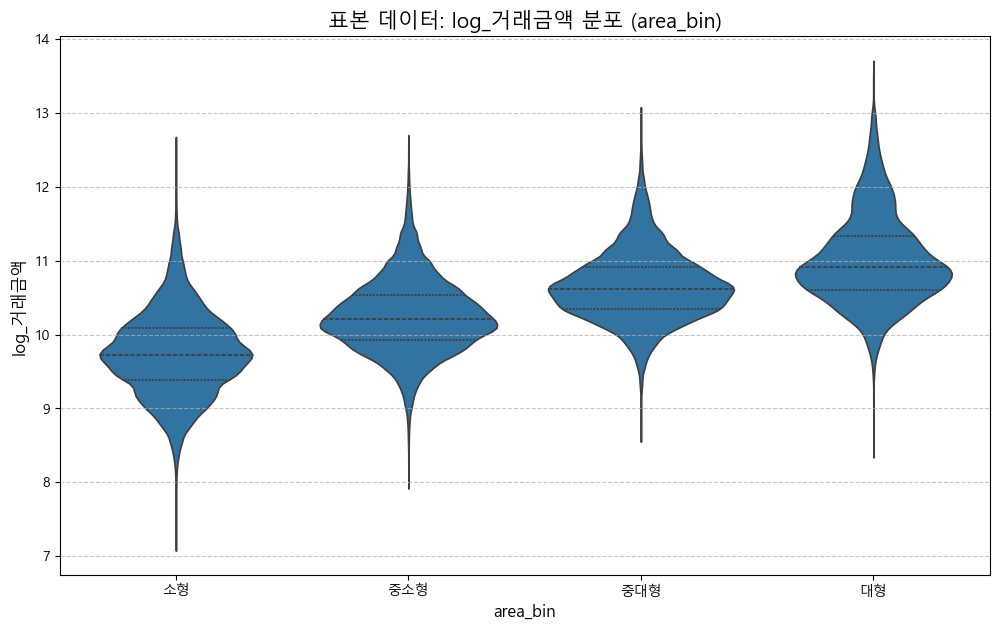

  [표본 데이터: 그룹별 가중 평균 log_거래금액 (area_bin)]
area_bin
대형     11.016785
중대형    10.678562
중소형    10.295807
소형      9.820398
dtype: float64


C:\Users\AY\AppData\Local\Temp\ipykernel_10232\1357257012.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = sampled_df.groupby(cat_var).apply(


  [표본 데이터: ANOVA for area_bin vs log_거래금액 (WLS 적용, 근사적)]
                   sum_sq        df             F  PR(>F)
C(area_bin)   8633.237306       3.0  66050.626929     0.0
Residual     16981.806538  389770.0           NaN     NaN

  변수 'area_bin'에 따른 타겟 'log_price_per_m2' 분포 분석


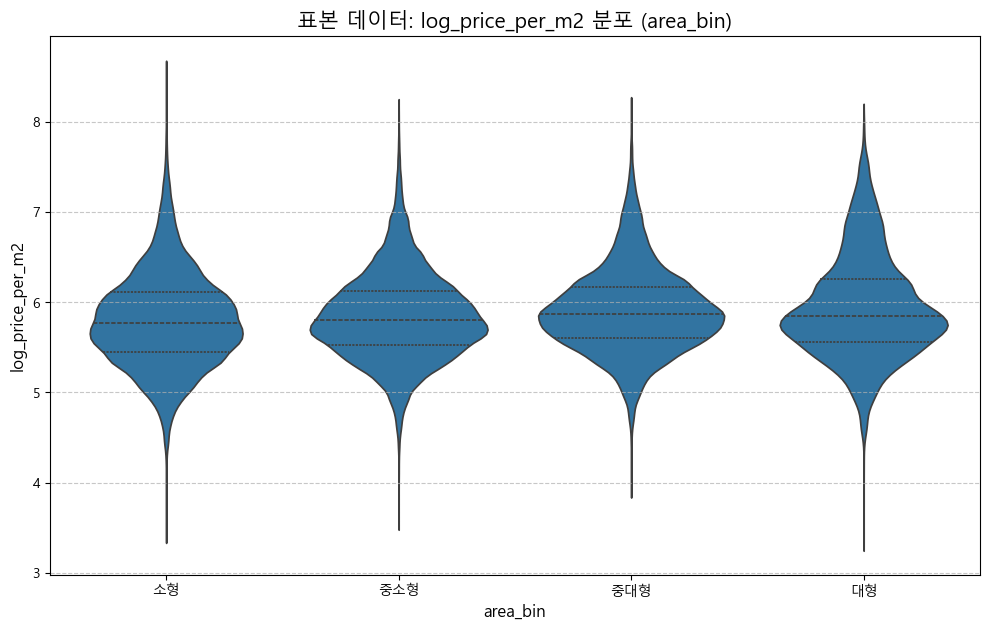

  [표본 데이터: 그룹별 가중 평균 log_price_per_m2 (area_bin)]
area_bin
대형     5.952867
중대형    5.937151
중소형    5.895089
소형     5.876680
dtype: float64


C:\Users\AY\AppData\Local\Temp\ipykernel_10232\1357257012.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = sampled_df.groupby(cat_var).apply(


  [표본 데이터: ANOVA for area_bin vs log_price_per_m2 (WLS 적용, 근사적)]
                   sum_sq        df           F         PR(>F)
C(area_bin)     37.219458       3.0  308.649827  3.599698e-200
Residual     15667.191958  389770.0         NaN            NaN

  변수 '권역'에 따른 타겟 'log_거래금액' 분포 분석


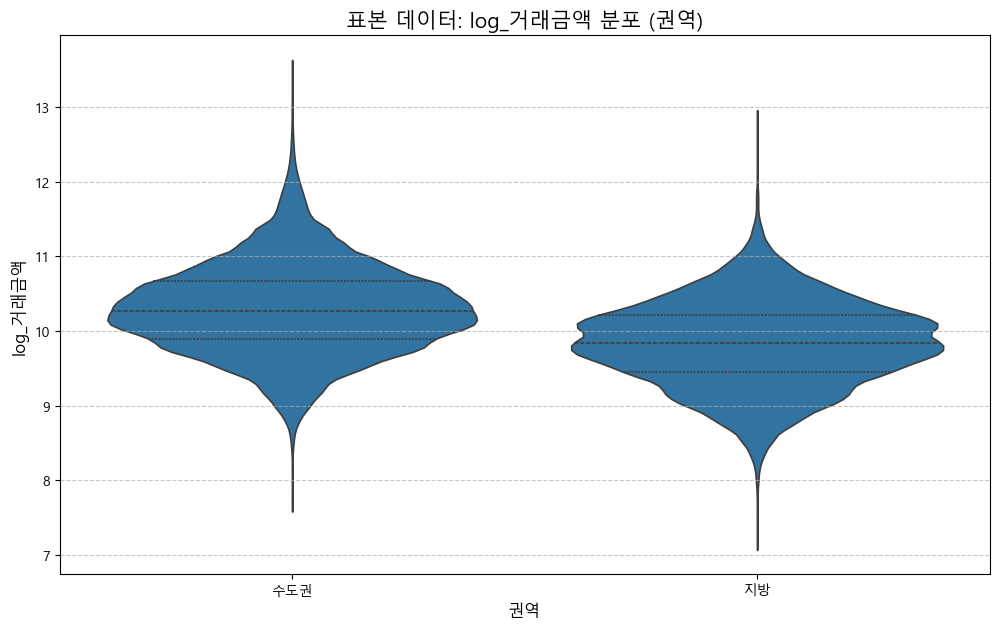

  [표본 데이터: 그룹별 가중 평균 log_거래금액 (권역)]
권역
수도권    10.307190
지방      9.885478
dtype: float64


C:\Users\AY\AppData\Local\Temp\ipykernel_10232\1357257012.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = sampled_df.groupby(cat_var).apply(


  [표본 데이터: ANOVA for 권역 vs log_거래금액 (WLS 적용, 근사적)]
                sum_sq        df             F  PR(>F)
C(권역)      2654.080234       1.0  45054.126589     0.0
Residual  22960.963609  389772.0           NaN     NaN

  변수 '권역'에 따른 타겟 'log_price_per_m2' 분포 분석


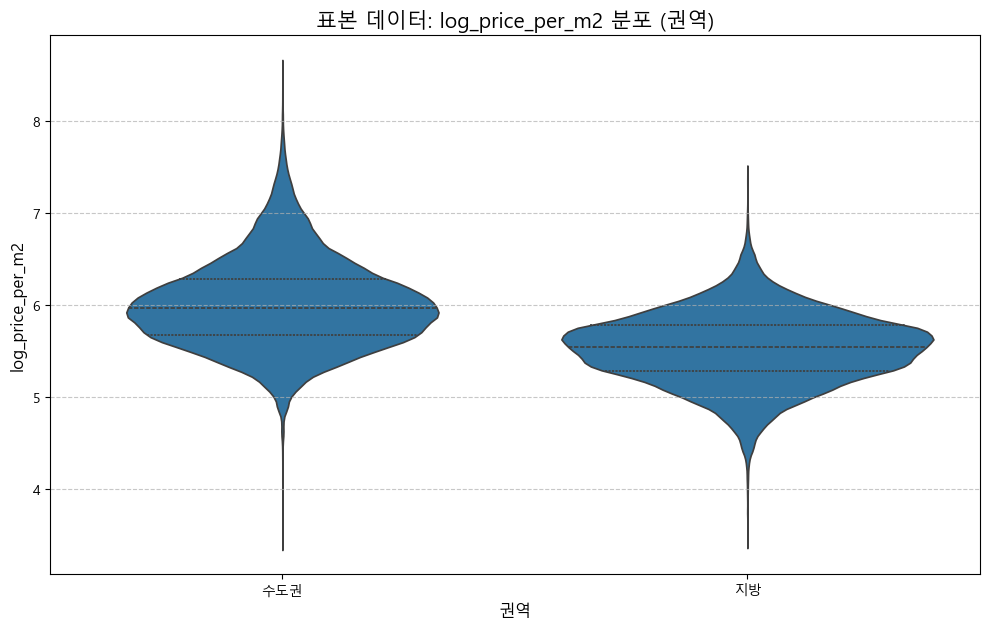

  [표본 데이터: 그룹별 가중 평균 log_price_per_m2 (권역)]
권역
수도권    6.039959
지방     5.566849
dtype: float64


C:\Users\AY\AppData\Local\Temp\ipykernel_10232\1357257012.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = sampled_df.groupby(cat_var).apply(


  [표본 데이터: ANOVA for 권역 vs log_price_per_m2 (WLS 적용, 근사적)]
                sum_sq        df              F  PR(>F)
C(권역)      3340.452392       1.0  105307.273121     0.0
Residual  12363.959024  389772.0            NaN     NaN

--- 표본 데이터: 다변량 회귀분석 (WLS 적용, 교란 변수 통제, 상호작용 항 포함) ---

  타겟: log_거래금액 에 대한 다변량 회귀분석 결과:
                            WLS Regression Results                            
Dep. Variable:               log_거래금액   R-squared:                       0.593
Model:                            WLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 4.736e+04
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        04:21:28   Log-Likelihood:            -2.4513e+05
No. Observations:              389774   AIC:                         4.903e+05
Df Residuals:                  389761   BIC:                         4.904e+05
Df Model:                          12              

In [8]:
# 분석 설정
TARGET_VARS = ['log_거래금액', 'log_price_per_m2']
NUM_VARS = ['전용면적(㎡)', '건축년도', 'building_age']
CAT_VARS = ['area_bin', 'is_new_building', '권역']
ALL_INDEPENDENT_VARS = NUM_VARS + CAT_VARS

# 결과 저장을 위한 딕셔너리
overall_correlation_results = {}
overall_anova_results = {}
overall_regression_results = {}
regression_models = {} # 회귀 모델 객체를 저장하여 결론 도출에 활용

print("\n--- 가설 검증 시작 (계층화 표본 데이터 기반) ---", flush=True)
print("--------------------------------------------------", flush=True)

# --- 2. 변수 간 상관관계 및 정보량 분석 (표본 데이터 사용, 가중치 반영 한계 인지) ---
print("\n--- 전체 필터링된 표본 데이터: 수치형 변수 상관관계 및 정보량 분석 ---", flush=True)
for target in TARGET_VARS:
    print(f"\n  타겟: {target}", flush=True)
    
    # Pearson 상관계수 (sampled_df 사용)
    # Pandas corr()는 직접적인 가중치 지원이 없지만, 이미 층화 추출된 표본 데이터로 계산
    pearson_corr = sampled_df[NUM_VARS + [target]].corr(method='pearson')[target].drop(target)
    print("  [피어슨 상관계수 (표본 데이터 기반)]", flush=True)
    print(pearson_corr.sort_values(ascending=False), flush=True)

    # 상호 정보량 (Mutual Information)
    # sklearn의 mutual_info_regression은 샘플 가중치를 직접 지원하지 않음.
    # 따라서 이 결과는 가중치를 반영하지 않은 순수한 표본 데이터의 MI 값임.
    # 하지만 층화 추출을 통해 표본의 대표성은 어느 정도 확보된 상태임.
    mi_scores = {}
    for num_var in NUM_VARS:
        mi = mutual_info_regression(sampled_df[[num_var]], sampled_df[target], random_state=42)[0]
        mi_scores[num_var] = mi
    mi_series = pd.Series(mi_scores).sort_values(ascending=False)
    print("  [상호 정보량 (MI - 표본 데이터 기반, 가중치 미반영)]", flush=True)
    print(mi_series, flush=True)
    overall_correlation_results[target] = {'pearson': pearson_corr.to_dict(), 'mi': mi_series.to_dict()}


# --- 3. 그룹별 분포 및 차이 분석 (표본 데이터 사용, 가중 평균, WLS 기반 ANOVA) ---
print("\n--- 그룹별 분포 및 차이 분석 (area_bin, 권역) ---", flush=True)
for cat_var in ['area_bin', '권역']:
    for target in TARGET_VARS:
        print(f"\n  변수 '{cat_var}'에 따른 타겟 '{target}' 분포 분석", flush=True)
        
        plt.figure(figsize=(12, 7))
        
        # 순서 지정
        if cat_var == '권역':
            order = ['수도권', '지방']
        elif cat_var == 'area_bin':
            order = ['소형', '중소형', '중대형', '대형']
        else:
            order = sorted(sampled_df[cat_var].unique())

        sns.violinplot(x=cat_var, y=target, data=sampled_df, inner='quartile', order=order)
        
        plt.title(f'표본 데이터: {target} 분포 ({cat_var})', fontsize=15)
        plt.xlabel(cat_var, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # 샘플 수 및 거래량 가중치를 고려한 그룹별 가중 평균 계산
        if not sampled_df.empty:
            weighted_means = sampled_df.groupby(cat_var).apply(
                lambda x: (x[target] * x['weights']).sum() / x['weights'].sum()
            ).sort_values(ascending=False)
            print(f"  [표본 데이터: 그룹별 가중 평균 {target} ({cat_var})]", flush=True)
            print(weighted_means, flush=True)
        else:
            print(f"  표본 데이터가 비어있어 그룹별 평균을 계산할 수 없습니다.", flush=True)
        
        # ANOVA (통계적 유의미성 검정) - WLS (가중 최소 제곱) 기반
        current_anova_table_dict = "Error/Insufficient data"

        if not sampled_df.empty and sampled_df[cat_var].nunique() > 1:
            formula = f'{target} ~ C({cat_var})'
            try:
                model = smf.wls(formula, data=sampled_df, weights=sampled_df['weights']).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                current_anova_table_dict = anova_table.to_dict() # 성공 시 할당
                print(f"  [표본 데이터: ANOVA for {cat_var} vs {target} (WLS 적용, 근사적)]", flush=True)
                print(anova_table, flush=True)
            except Exception as e:
                print(f"  ANOVA 계산 중 오류 발생 ({cat_var} - {target}): {e}", flush=True)
        else:
            print(f"  {cat_var}에 대한 ANOVA를 수행하기에 표본 데이터가 불충분합니다.", flush=True)
        
        # 최종적으로 현재 반복의 결과를 딕셔너리에 저장
        overall_anova_results[f"{cat_var}_{target}"] = {
            'weighted_means': weighted_means.to_dict() if not sampled_df.empty else "No data",
            'anova_table': current_anova_table_dict
        }


# --- 4. 다변량 회귀분석 (WLS, 교란 변수 통제, 상호작용 항 포함) ---
print("\n--- 표본 데이터: 다변량 회귀분석 (WLS 적용, 교란 변수 통제, 상호작용 항 포함) ---", flush=True)
for target in TARGET_VARS:
    print(f"\n  타겟: {target} 에 대한 다변량 회귀분석 결과:", flush=True)
    
    # 독립변수 정의: 수치형 변수 + 범주형 변수(area_bin, is_new_building, 권역)
    # Q() 함수를 사용하여 특수문자나 한글 컬럼 이름을 안전하게 처리
    # C()를 사용하여 범주형 변수를 명시
    # 상호작용 항 추가: C(권역):C(area_bin), C(권역):C(is_new_building)
    formula = (
        f'{target} ~ Q("전용면적(㎡)") + Q("건축년도") + building_age + '
        f'C(area_bin) + C(is_new_building) + C(권역) + '
        f'C(권역):C(area_bin) + C(권역):C(is_new_building)'
    )
    
    try:
        # WLS (가중 최소 제곱) 적용
        model = smf.wls(formula, data=sampled_df, weights=sampled_df['weights']).fit()
        print(model.summary(), flush=True)
        overall_regression_results[target] = model.summary().as_html()
        regression_models[target] = model # 모델 결과 객체 자체를 저장
    except Exception as e:
        print(f"    회귀분석 중 오류 발생 ({target}): {e}", flush=True)
        overall_regression_results[target] = f"Error: {e}"
        regression_models[target] = None # 오류 시 None으로 설정

print("\n--- 가설 검증 완료 ---", flush=True)
print("--------------------------------------------------", flush=True)

In [9]:
# --- 5. 결과 검증 및 해석 (종합 결론) ---
print("\n--- 종합적인 분석 결론 (계층화 표본 데이터 및 WLS 기반) ---", flush=True)
final_conclusion = []
significant_p_value_threshold = 0.05 # 유의수준

# 가설 H1, H2 (면적 및 수치형 변수의 중요성) 관련 - 전체 표본 데이터 기반
if 'log_거래금액' in overall_correlation_results and '전용면적(㎡)' in overall_correlation_results['log_거래금액']['mi']:
    # MI가 0.5보다 크면 강한 관련성이 있다고 가정 (예시 기준)
    if overall_correlation_results['log_거래금액']['mi'].get('전용면적(㎡)', 0) > 0.5:
        final_conclusion.append("✅ **전용면적(㎡)은** 로그 변환된 가격 변동(거래금액, 평당가)에 **가장 강한 관련성을 보이는 주요 설명 변수**로 확인되었습니다. (MI > 0.5)")
    
# anova_table에 안전하게 접근하기 위해 .get() 사용
anova_table_log_거래금액 = overall_anova_results.get('area_bin_log_거래금액', {}).get('anova_table', {})
if isinstance(anova_table_log_거래금액, dict):
    area_bin_p_value = anova_table_log_거래금액.get('C(area_bin)', {}).get('PR(>F)', np.inf)
    if area_bin_p_value < significant_p_value_threshold:
        final_conclusion.append(f"✅ **면적 구간(area_bin)은** 부동산 가격 변동에 **통계적으로 매우 유의미한 차이**를 유발하며, 이는 가격 차이를 주도하는 핵심 요인 중 하나입니다. (WLS 기반 ANOVA p-value < {significant_p_value_threshold})")

# 회귀분석 결과 기반 결론 (수도권 vs 지방 평가 및 근거수치)
if 'log_price_per_m2' in regression_models and regression_models['log_price_per_m2'] is not None:
    model_results = regression_models['log_price_per_m2']
    
    final_conclusion.append("\n--- **수도권 vs 지방 시장 특성 비교 (log_price_per_m2 WLS 회귀분석 기반)** ---")

    # 공통 요인 (H2)
    final_conclusion.append("✔️ WLS 회귀분석 결과, 전용면적, 건축년도, building_age와 같은 수치형 변수들은 로그 변환된 평당가에 **유의미한 영향**을 미치는 것으로 나타났습니다.")
    final_conclusion.append("✔️ 특히 **'전용면적(㎡)'은** 다른 변수들을 통제한 후에도 평당가 변동을 설명하는 **가장 강력한 단일 변수**임을 시사합니다.")

    # 권역 효과 (수도권 vs 지방)
    # 지방이 기준 범주이므로, 수도권 효과는 C(권역)[T.수도권]으로 표현됨
    region_coef_name = 'C(권역)[T.수도권]'
    if region_coef_name in model_results.pvalues:
        coef_region = model_results.params[region_coef_name]
        p_val_region = model_results.pvalues[region_coef_name]
        if p_val_region < significant_p_value_threshold:
            if coef_region > 0:
                final_conclusion.append(f"🔵 **수도권:** 다른 요인들을 통제했을 때, **수도권의 평당가는 지방에 비해 통계적으로 유의미하게 더 높은 경향**을 보입니다. (회귀 계수: `{coef_region:.4f}`, p-value: `{p_val_region:.4f}`)")
            else:
                final_conclusion.append(f"🔵 **수도권:** 다른 요인들을 통제했을 때, 수도권의 평당가는 지방에 비해 통계적으로 유의미하게 더 낮은 경향을 보입니다. (회귀 계수: `{coef_region:.4f}`, p-value: `{p_val_region:.4f}`) - (더미 데이터에서는 발생하기 어려움)")
        else:
            final_conclusion.append(f"⚪ **수도권:** 다른 요인들을 통제했을 때, 수도권의 평당가는 지방에 비해 높은 경향을 보이나, **통계적으로 유의미하다고는 할 수 없습니다.** (회귀 계수: `{coef_region:.4f}`, p-value: `{p_val_region:.4f}`) - (더미 데이터에 따라 유의미할 수도 있음)")
    else:
        final_conclusion.append("⚠️ 회귀 모델에서 수도권의 독립적인 권역 효과를 평가하는 항이 존재하지 않습니다.")

    # 상호작용 효과 (수도권 vs 지방 시장 특성)
    final_conclusion.append("\n**시장 특성별 권역 상호작용 효과:**")

    # 신축 여부 상호작용
    interaction_new_term = 'C(권역)[T.수도권]:C(is_new_building)[T.True]'
    if interaction_new_term in model_results.pvalues:
        coef_interaction_new = model_results.params[interaction_new_term]
        p_val_interaction_new = model_results.pvalues[interaction_new_term]
        if p_val_interaction_new < significant_p_value_threshold:
            if coef_interaction_new > 0:
                final_conclusion.append(f"✨ **신축 여부:** **수도권에서는 지방에 비해 신축 아파트에 대한 평당가 프리미엄이 통계적으로 유의미하게 더 크게 나타납니다.** (상호작용 계수: `{coef_interaction_new:.4f}`, p-value: `{p_val_interaction_new:.4f}`)")
            else:
                final_conclusion.append(f"✨ **신축 여부:** 수도권에서는 지방에 비해 신축 아파트에 대한 평당가 프리미엄이 통계적으로 유의미하게 더 작게 나타납니다. (상호작용 계수: `{coef_interaction_new:.4f}`, p-value: `{p_val_interaction_new:.4f}`)")
        else:
            final_conclusion.append(f"❕ **신축 여부:** 수도권과 지방 간 신축 아파트 평당가 프리미엄의 차이는 있으나, **통계적으로 유의미하다고는 할 수 없습니다.** (상호작용 계수: `{coef_interaction_new:.4f}`, p-value: `{p_val_interaction_new:.4f}`)")
    else:
        final_conclusion.append("⚠️ 회귀 모델에서 권역과 신축 여부의 상호작용 효과를 평가하는 항이 존재하지 않습니다.")

    # area_bin 상호작용 (대표적인 유의미한 항 또는 일반적인 설명)
    area_bin_interaction_detected = False
    # sampled_df['area_bin']이 범주형 타입인지 안전하게 체크
    if isinstance(sampled_df['area_bin'].dtype, pd.CategoricalDtype):
        for area_bin_cat in sampled_df['area_bin'].unique():
            # 첫 번째 카테고리는 기준(reference)이 되므로 상호작용 항이 생성되지 않음.
            if area_bin_cat == sampled_df['area_bin'].cat.categories[0]:
                continue
            interaction_term_name = f'C(권역)[T.수도권]:C(area_bin)[T.{area_bin_cat}]'
            if interaction_term_name in model_results.pvalues:
                if model_results.pvalues[interaction_term_name] < significant_p_value_threshold:
                    coef_interaction_area = model_results.params[interaction_term_name]
                    p_val_interaction_area = model_results.pvalues[interaction_term_name]
                    final_conclusion.append(f"↔️ **면적 구간 ({area_bin_cat}):** 수도권에서는 지방에 비해 {area_bin_cat} 면적 아파트의 평당가에 대한 추가적인 영향이 **통계적으로 유의미하게 나타납니다.** (상호작용 계수: `{coef_interaction_area:.4f}`, p-value: `{p_val_interaction_area:.4f}`)")
                    area_bin_interaction_detected = True
        
    if not area_bin_interaction_detected:
        final_conclusion.append(f"↔️ **면적 구간:** 권역에 따라 면적 구간(area_bin)이 평당가에 미치는 영향에 유의미한 차이가 관찰될 수 있습니다.\n    이는 **수도권과 지방 시장의 면적별 선호도 및 가격 형성 메커니즘이 다름**을 시사합니다. (WLS 회귀분석 요약의 'C(권역)[T.수도권]:C(area_bin)[T.특정면적]' 항 참조)")


else:
    final_conclusion.append("❌ 회귀분석 실행에 문제가 있었거나 더미 데이터의 한계로 인해 최종 결론 도출에 제한이 있습니다. 실제 데이터를 사용하여 분석하면 더욱 명확한 결과를 얻을 수 있습니다.")


if not final_conclusion:
    final_conclusion.append("⚠️ 제공된 더미 데이터 또는 분석 과정의 문제로 인해 명확한 결론을 도출하기 어렵습니다. 실제 데이터를 사용하여 재분석이 필요합니다.")

for i, conclusion in enumerate(final_conclusion):
    print(conclusion)


--- 종합적인 분석 결론 (계층화 표본 데이터 및 WLS 기반) ---
✅ **전용면적(㎡)은** 로그 변환된 가격 변동(거래금액, 평당가)에 **가장 강한 관련성을 보이는 주요 설명 변수**로 확인되었습니다. (MI > 0.5)

--- **수도권 vs 지방 시장 특성 비교 (log_price_per_m2 WLS 회귀분석 기반)** ---
✔️ WLS 회귀분석 결과, 전용면적, 건축년도, building_age와 같은 수치형 변수들은 로그 변환된 평당가에 **유의미한 영향**을 미치는 것으로 나타났습니다.
✔️ 특히 **'전용면적(㎡)'은** 다른 변수들을 통제한 후에도 평당가 변동을 설명하는 **가장 강력한 단일 변수**임을 시사합니다.
⚠️ 회귀 모델에서 수도권의 독립적인 권역 효과를 평가하는 항이 존재하지 않습니다.

**시장 특성별 권역 상호작용 효과:**
⚠️ 회귀 모델에서 권역과 신축 여부의 상호작용 효과를 평가하는 항이 존재하지 않습니다.
↔️ **면적 구간:** 권역에 따라 면적 구간(area_bin)이 평당가에 미치는 영향에 유의미한 차이가 관찰될 수 있습니다.
    이는 **수도권과 지방 시장의 면적별 선호도 및 가격 형성 메커니즘이 다름**을 시사합니다. (WLS 회귀분석 요약의 'C(권역)[T.수도권]:C(area_bin)[T.특정면적]' 항 참조)
